# This notebook is for the Fair-Shapely experiment

In [13]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [15]:
from src.data.unified_dataloader import load_dataset

a, processed_compas4race= load_dataset('compas4race')

In [16]:
processed_compas4race.head(3)

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree_F,c_charge_degree_M,type_of_assessment_Risk of Recidivism,score_text_High,score_text_Low,score_text_Medium,two_year_recid
0,1,-0.061334,1,-0.162011,-0.195526,-0.227625,-0.735792,1,0,1,0,1,0,1
1,1,-0.901239,1,-0.162011,-0.195526,1.703263,0.059694,1,0,1,0,1,0,1
2,1,-0.985229,1,-0.162011,1.785502,-0.227625,-0.536921,1,0,1,1,0,0,0


### 3. Split label/unlabel data, split train/test data.

In [17]:
'''COMPAS for race research'''
df = processed_compas4race.copy()
X = df.drop('two_year_recid', axis=1)
y = df['two_year_recid']


In [ ]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='compas4race')

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-------------------------------------
-------------1th fold----------------
-------------------------------------
1. Split the compas4race dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_majority_label0中找到合适的值替换X_train_minority_label0中的数据
4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 42
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据
4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出v

### 4. read saved_csv file and make plots

In [19]:
def extract_original_values(fold):
    original_DR = fold.loc[0,'new_DR']
    original_DP = fold.loc[0,'new_DP']
    original_EO = fold.loc[0,'new_EO']
    original_PQP = fold.loc[0,'new_PQP']
    return original_DR, original_DP, original_EO, original_PQP

In [20]:
''' german credit dataset '''

fold1 = pd.read_csv('saved_results/compas4race/1-fold_results.csv')
fold2 = pd.read_csv('saved_results/compas4race/2-fold_results.csv')
fold3 = pd.read_csv('saved_results/compas4race/3-fold_results.csv')
fold4 = pd.read_csv('saved_results/compas4race/4-fold_results.csv')
fold5 = pd.read_csv('saved_results/compas4race/5-fold_results.csv')

fold1_original_DR, fold1_original_DP, fold1_original_EO, fold1_original_PQP = extract_original_values(fold1)
fold2_original_DR, fold2_original_DP, fold2_original_EO, fold2_original_PQP = extract_original_values(fold2)
fold3_original_DR, fold3_original_DP, fold3_original_EO, fold3_original_PQP = extract_original_values(fold3)
fold4_original_DR, fold4_original_DP, fold4_original_EO, fold4_original_PQP = extract_original_values(fold4)
fold5_original_DR, fold5_original_DP, fold5_original_EO, fold5_original_PQP = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

fold1.head(10)

,action_number,new_DR,new_DP,new_EO,new_PQP
1,1,0.097450,0.174273,0.197917,0.098815
2,2,0.110348,0.156119,0.175000,0.101383
3,3,0.120247,0.128476,0.154167,0.119800
4,4,0.113482,0.133733,0.127083,0.081718
5,5,0.107308,0.141933,0.156250,0.100210
6,6,0.114197,0.143025,0.156250,0.100413
7,7,0.106322,0.154863,0.187500,0.117058
8,8,0.108202,0.134955,0.137500,0.089293
9,9,0.102380,0.180985,0.191667,0.079140
10,10,0.112046,0.165575,0.185417,0.097479


In [21]:
fold1.tail(20)

,action_number,new_DR,new_DP,new_EO,new_PQP
256,256,0.109383,0.266360,0.293750,0.043462
257,257,0.111012,0.228598,0.245833,0.062182
258,258,0.103313,0.275023,0.302083,0.048033
259,259,0.103064,0.257232,0.297917,0.065937
260,260,0.129042,0.291157,0.335417,0.042354
261,261,0.119398,0.241229,0.277083,0.079772
262,262,0.120900,0.274327,0.310417,0.049569
263,263,0.106319,0.258290,0.289583,0.061750
264,264,0.091325,0.188092,0.187500,0.056288
265,265,0.111633,0.257894,0.283333,0.052472


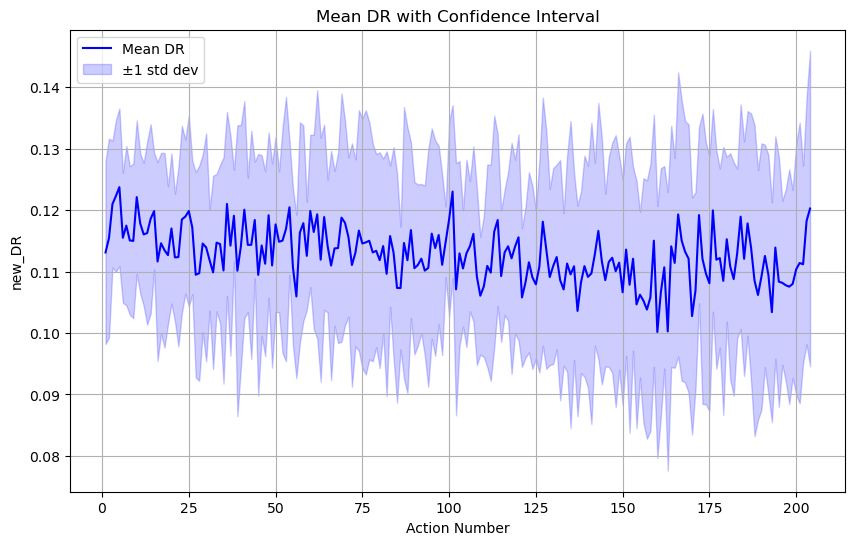

In [22]:
import matplotlib.pyplot as plt

for fold in [fold1, fold2, fold3, fold4, fold5]:
    fold['action_number'] = pd.to_numeric(fold['action_number'])

min_action = 1
max_action = min([
    len(fold1['action_number']),
    len(fold2['action_number']),
    len(fold3['action_number']),
    len(fold4['action_number']),
    len(fold5['action_number'])
])

# 创建一个包含所有可能action_number的列表
action_range = np.arange(min_action, max_action + 1)

# 创建一个字典来存储每个action_number对应的new_DR值
dr_values = {action: [] for action in action_range}

# 收集每个action_number对应的所有new_DR值
for fold in [fold1, fold2, fold3, fold4, fold5]:
    mask = (fold['action_number'] >= min_action) & (fold['action_number'] <= max_action)
    for action, dr in zip(fold.loc[mask, 'action_number'], fold.loc[mask, 'new_DR']):
        dr_values[action].append(dr)

# 计算每个action_number的均值和标准差
means = []
stds = []
for action in action_range:
    values = dr_values[action]
    means.append(np.mean(values))
    stds.append(np.std(values))

# 转换为numpy数组以便于计算
means = np.array(means)
stds = np.array(stds)

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制均值线
plt.plot(action_range, means, 'b-', label='Mean DR')

# 绘制填充区域（均值±标准差）
plt.fill_between(action_range, 
                 means - stds,
                 means + stds,
                 alpha=0.2,
                 color='b',
                 label='±1 std dev')

plt.xlabel('Action Number')
plt.ylabel('new_DR')
plt.title('Mean DR with Confidence Interval')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()

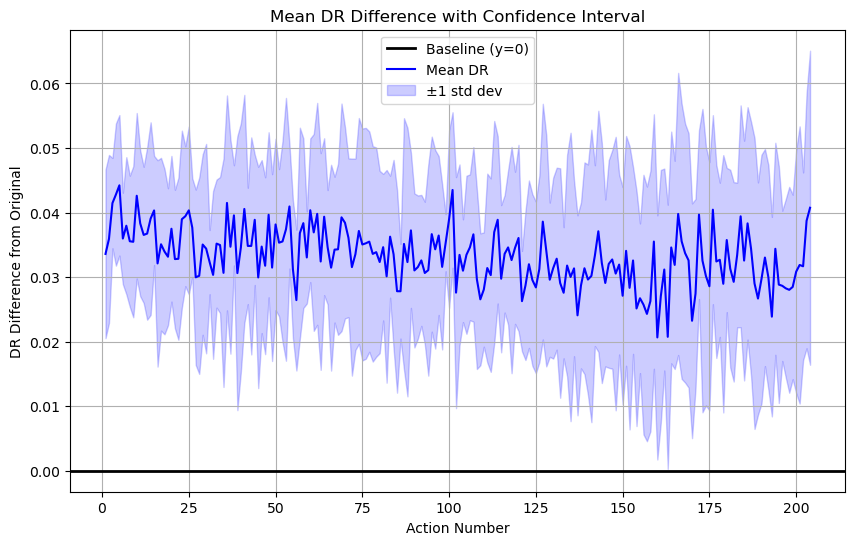

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 首先确保所有DataFrame中的action_number列都是数值类型
for fold in [fold1, fold2, fold3, fold4, fold5]:
    fold['action_number'] = pd.to_numeric(fold['action_number'])

# 减去各自的original_DR
fold1['new_DR'] = fold1['new_DR'] - fold1_original_DR
fold2['new_DR'] = fold2['new_DR'] - fold2_original_DR
fold3['new_DR'] = fold3['new_DR'] - fold3_original_DR
fold4['new_DR'] = fold4['new_DR'] - fold4_original_DR
fold5['new_DR'] = fold5['new_DR'] - fold5_original_DR

# 找到最小的action_number范围
min_action = max([
    fold1['action_number'].min(),
    fold2['action_number'].min(),
    fold3['action_number'].min(),
    fold4['action_number'].min(),
    fold5['action_number'].min()
])

max_action = min([
    fold1['action_number'].max(),
    fold2['action_number'].max(),
    fold3['action_number'].max(),
    fold4['action_number'].max(),
    fold5['action_number'].max()
])

# 创建一个包含所有可能action_number的列表
action_range = np.arange(min_action, max_action + 1)

# 创建一个字典来存储每个action_number对应的new_DR值
dr_values = {action: [] for action in action_range}

# 收集每个action_number对应的所有new_DR值
for fold in [fold1, fold2, fold3, fold4, fold5]:
    mask = (fold['action_number'] >= min_action) & (fold['action_number'] <= max_action)
    for action, dr in zip(fold.loc[mask, 'action_number'], fold.loc[mask, 'new_DR']):
        dr_values[action].append(dr)

# 计算每个action_number的均值和标准差
means = []
stds = []
for action in action_range:
    values = dr_values[action]
    means.append(np.mean(values))
    stds.append(np.std(values))

# 转换为numpy数组以便于计算
means = np.array(means)
stds = np.array(stds)

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制加粗的y=0基准线
plt.axhline(y=0, color='black', linewidth=2, linestyle='-', label='Baseline (y=0)')

# 绘制均值线
plt.plot(action_range, means, 'b-', label='Mean DR')

# 绘制填充区域（均值±标准差）
plt.fill_between(action_range, 
                 means - stds,
                 means + stds,
                 alpha=0.2,
                 color='b',
                 label='±1 std dev')

plt.xlabel('Action Number')
plt.ylabel('DR Difference from Original')
plt.title('Mean DR Difference with Confidence Interval')
plt.legend()
plt.grid(True)

# 显示图形
plt.show()